## Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
#importing the dataset using read_csv
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


By looking at the dataset and problem statement, I can say that Churn is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(7043, 21)

Our dataset has 7043 rows and 21 columns

In [4]:
#Checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

I can see there are no null values present in my dataset.

In [5]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

These are my feature/column names

### Dataset Description
The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents  
   
Input features:
       
    'customerID', 
    'gender', 
    'SeniorCitizen', 
    'Partner', 
    'Dependents',
    'tenure', 
    'PhoneService', 
    'MultipleLines', 
    'InternetService',
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies', 
    'Contract', 
    'PaperlessBilling',
    'PaymentMethod', 
    'MonthlyCharges', 
    'TotalCharges'
       
----------------------------------------------------  
   Output feature:
- Churn (Yes or No)

In [6]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

After looking at the above output, I can say that there are 11 missing values for Total Charges. Let me replace/remove these 11 rows from the dataset

In [7]:
#As the dtype of TotalCharges is object, let me convert it to numeric first.
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now I see 11 null values in TotalCharges

In [8]:
#checking skewness to decide mean or median
df.TotalCharges.skew()

0.961642499724251

As TotalCharges col is skewed, I'll use median to fill nan's

In [9]:
#using median on TotalCharges
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

I can see null values are removed.

In [11]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

6572-ADKRS    1
7742-MYPGI    1
2481-SBOYW    1
0928-XUTSN    1
5651-YLPRD    1
             ..
6741-EGCBI    1
3594-UVONA    1
1849-RJYIG    1
1840-BIUOG    1
4451-RWASJ    1
Name: customerID, Length: 7043, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Male      3555
Female    3488
Name: gender, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No     3641
Yes    3402
Name: Partner, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No     4933
Yes    2110
Name: Dependents, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Yes    6361
No      682
Name: PhoneService, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
No                  3390
Yes                 2971
No phone se

Now, I don't see any unexpected and unwanted entries in dataset.

In [12]:
#Checking unique values
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

I see customerID matches the number of rows. It means ID is unique for everyone hence I can drop this column.

In [13]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Successffully deleted Cutomer ID column.

In [14]:
#Checking data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- SeniorCitizen, tenure are integer column.
- MonthlyCharges, TotalCharges are of float datatypes.
- Rest all are of object datatypes.

## EDA

### Univariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

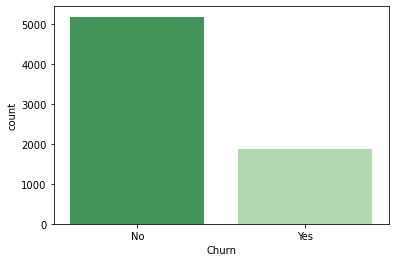

In [15]:
#Analysing our target variable 
sns.countplot(df["Churn"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first.
- The churn rate is around 26% in the dataset. Which means 26 % of customers switched to another firm.
- Also, I see class imbalance which I will treat later.

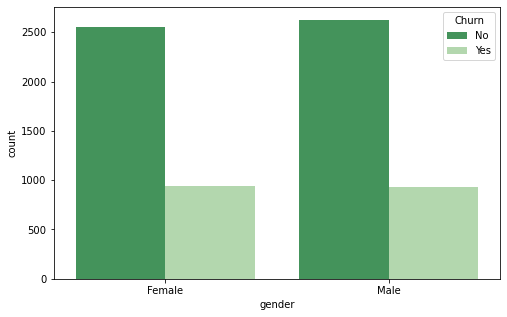

In [16]:
#Checking Churn of Individuals of Different Gender
plt.figure(figsize=(8,5))
sns.countplot(df["gender"],hue=df["Churn"],palette="Greens_r")
plt.show()

I can see a significant gap in the earnings between males and females over here.

- For both gender, the churn rate is around 25%.
- interestingly, we have almost equal count for both the gender.

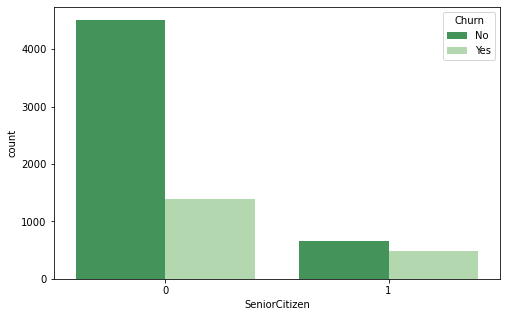

In [17]:
#Checking Churn status of senior citizen. 
plt.figure(figsize=(8,5))
sns.countplot(df["SeniorCitizen"],hue=df["Churn"],palette="Greens_r")
plt.show()

- Senior citizens are most likely to change their service provider.

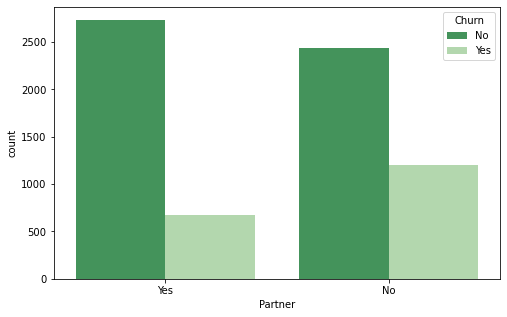

In [18]:
#Checking Churn status of an Individual with Partner
plt.figure(figsize=(8,5))
sns.countplot(df["Partner"],hue=df["Churn"],palette="Greens_r")
plt.show()

We have a very interesting observation here:
- An individual with no partner are more likely to change their service provider.
- The count is almost same for both the categories.

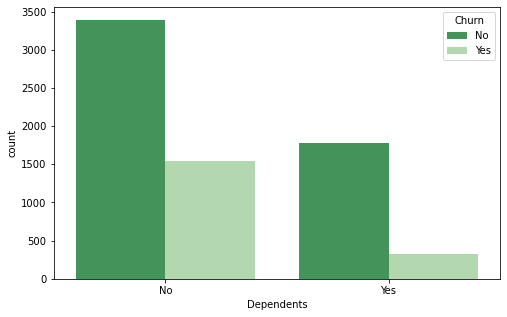

In [19]:
#Checking Churn status of an Individual with Dependents
plt.figure(figsize=(8,5))
sns.countplot(df["Dependents"],hue=df["Churn"],palette="Greens_r")
plt.show()

- An individual with no dependents are more likely to change their service provider.
- Also, the independents use these services more.  

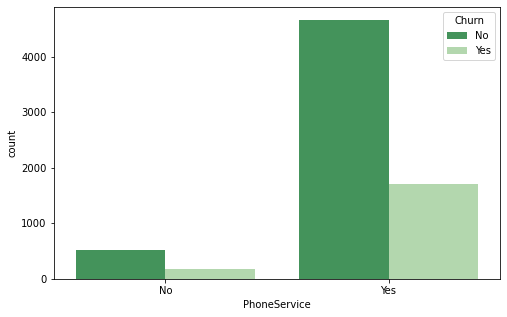

In [20]:
#Checking Churn status of an Individual with PhoneService
plt.figure(figsize=(8,5))
sns.countplot(df["PhoneService"],hue=df["Churn"],palette="Greens_r")
plt.show()

- I see 90-95% of indivduals have availed for Phone service
- However, the churn rate is same in both the categories

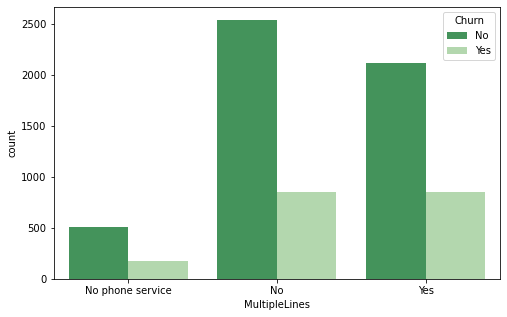

In [21]:
#Checking Churn status of an Individual with MultipleLines
plt.figure(figsize=(8,5))
sns.countplot(df["MultipleLines"],hue=df["Churn"],palette="Greens_r")
plt.show()

- I see 40-60% distribution of indivduals with multiple lines and without multiple line of Phone service 
- Also, customer with multiple lines are more likely to quit the services. 

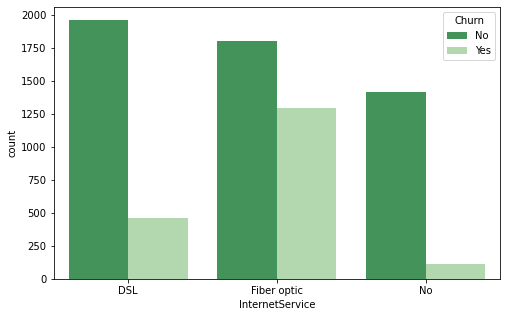

In [22]:
#Checking Churn status of an Individual with InternetService 
plt.figure(figsize=(8,5))
sns.countplot(df["InternetService"],hue=df["Churn"],palette="Greens_r")
plt.show()

For internet services, Fiber optic are used more when compared to DSL.
However, Fiber optic users show a high churn rate. 

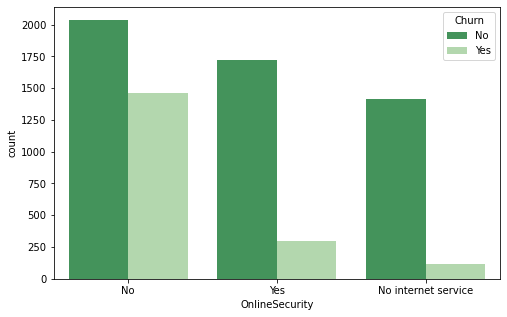

In [23]:
#Checking Churn status of an Individual with OnlineSecurity
plt.figure(figsize=(8,5))
sns.countplot(df["OnlineSecurity"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit their sevices if they don't get online security.

Also, I see only 27% users with online security. 

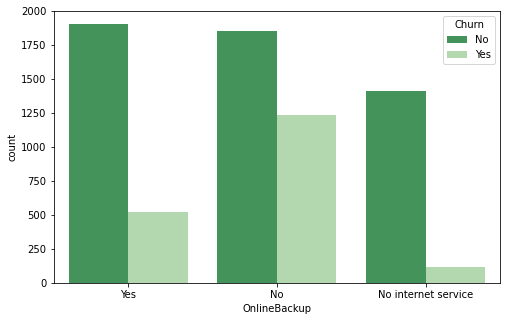

In [24]:
#Checking Churn status of an Individual with OnlineBackup service
plt.figure(figsize=(8,5))
sns.countplot(df["OnlineBackup"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get online backup facility.

Also, I see only 33% users with online backup facility. 

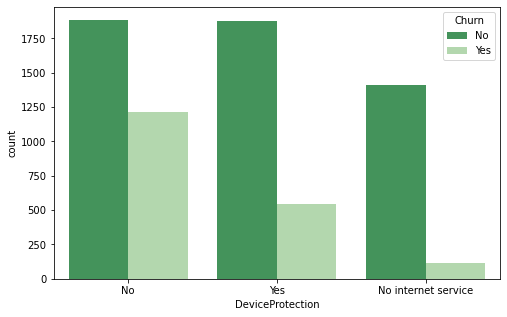

In [25]:
#Checking Churn status of an Individual with DeviceProtection service
plt.figure(figsize=(8,5))
sns.countplot(df["DeviceProtection"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get Device Protection service

Also, I see only 32% users with Device Protection service. 

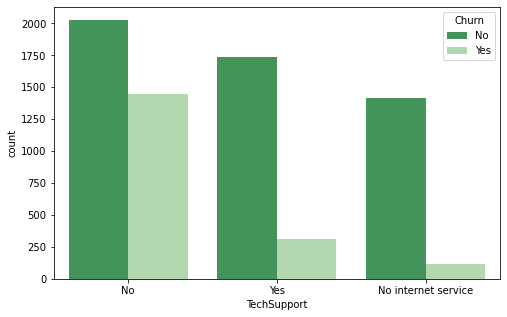

In [26]:
#Checking Churn status of an Individual with TechSupport service
plt.figure(figsize=(8,5))
sns.countplot(df["TechSupport"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get proper Tech Support

Also, I see only 27% users with Tech Support service. 

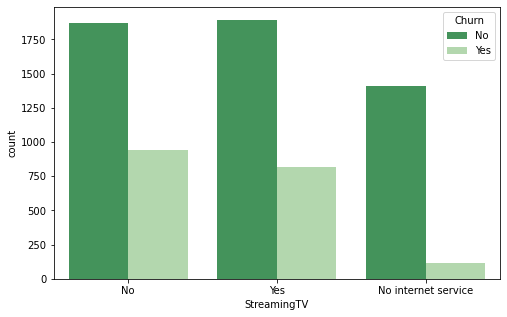

In [27]:
#Checking Churn status of an Individual with StreamingTV service
plt.figure(figsize=(8,5))
sns.countplot(df["StreamingTV"],hue=df["Churn"],palette="Greens_r")
plt.show()

Customers are more likely to quit the sevices if they don't get Streaming for TV

Also, I see 37% users with TV Streaming service.

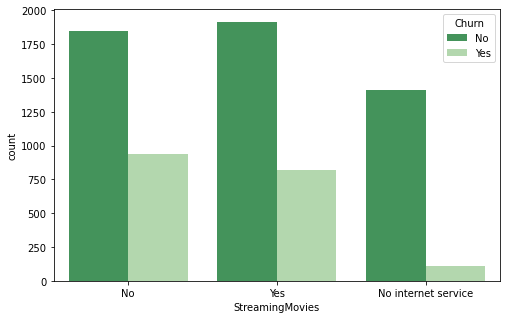

In [28]:
#Checking Churn status of an Individual with StreamingMovies service
plt.figure(figsize=(8,5))
sns.countplot(df["StreamingMovies"],hue=df["Churn"],palette="Greens_r")
plt.show()

Streaming of Movies doesn't affect much on the churn rate.

Also, I see 38% users with Movie Streaming service.

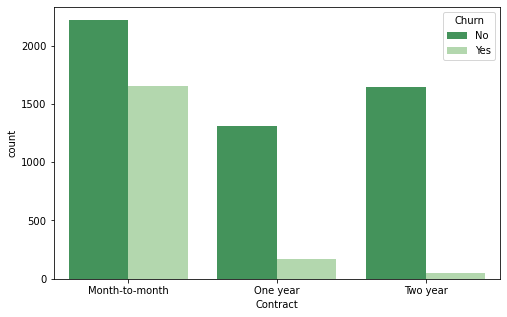

In [29]:
#Checking Churn status of an Individual with Contract type
plt.figure(figsize=(8,5))
sns.countplot(df["Contract"],hue=df["Churn"],palette="Greens_r")
plt.show()

I can clearly see that customers are more likely to stay if they have a yearly contract which is pretty obvious.

Most of the customers prefer month-to-month contract.

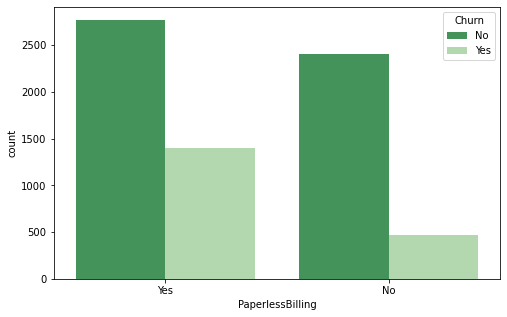

In [30]:
#Checking Churn status of an Individual with PaperlessBilling
plt.figure(figsize=(8,5))
sns.countplot(df["PaperlessBilling"],hue=df["Churn"],palette="Greens_r")
plt.show()

PaperlessBilling doesn't affect much on the churn rate.

Also, I see most of the users prefer Paperless Billing

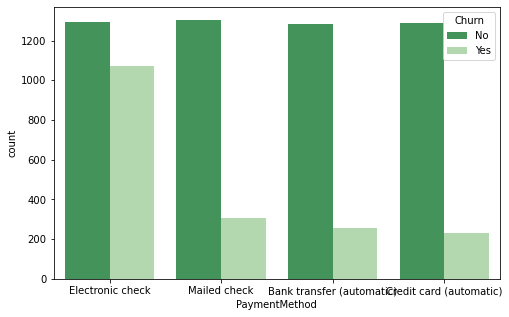

In [31]:
#Checking Churn status of an Individual with different PaymentMethod
plt.figure(figsize=(8,5))
sns.countplot(df["PaymentMethod"],hue=df["Churn"],palette="Greens_r")
plt.show()

Most of the customers pay by Electronic check.

Interesting thing to note here is that customer paying through Electronic check has higher churn rate. 

### Bivariate Analysis

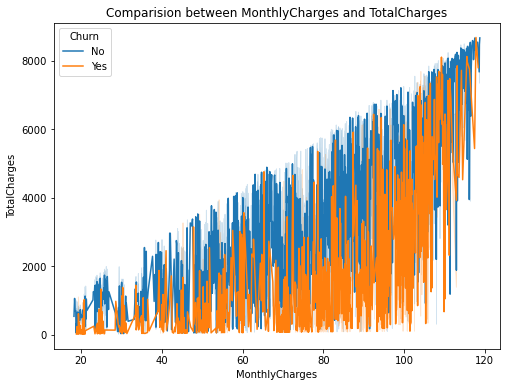

In [32]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and TotalCharges')
sns.lineplot(df['MonthlyCharges'],df['TotalCharges'],hue=df['Churn']);

Yes for churn has maximum count near 50-100 MonthlyCharges.And i can see a linearly increasing curve.

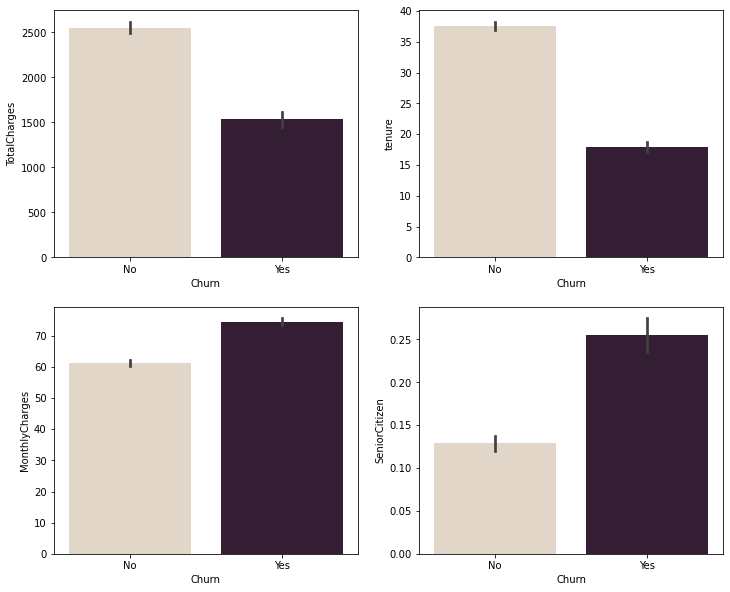

In [33]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn with TotalCharges
sns.barplot(x='Churn',y='TotalCharges',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Churn with tenure
sns.barplot(x='Churn',y='tenure',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Churn with MonthlyCharges
sns.barplot(x='Churn',y='MonthlyCharges',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Churn with SeniorCitizen
sns.barplot(x='Churn',y='SeniorCitizen',ax=axes[1,1],data=df,palette='ch:.25')

plt.show()

By looking into the graph below are my observations
- If total charges is high then there is no churn.
- If tenure is high then there is no churn.
- If Monthly Charges are high then there is churn.
- If the person is senior citizen then there is churn.

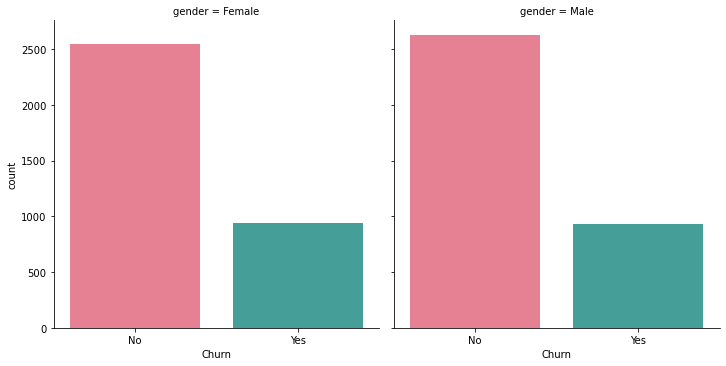

In [34]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='gender',data=df,kind='count',palette="husl")

For both sex the Churn is equal.

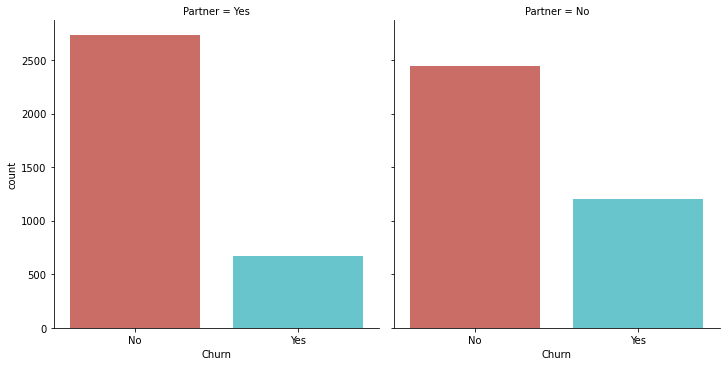

In [35]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Partner',data=df,kind='count',palette="hls")

Customers with partners are high in number.But Customers having partners are less churned than customers having partners.

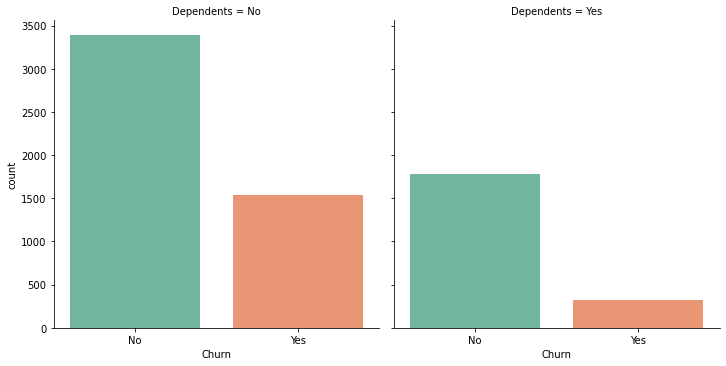

In [36]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Dependents',data=df,kind='count',palette="Set2")

Customers without dependents are more in number.But Customers having dependents are less churned than customers not having dependents.

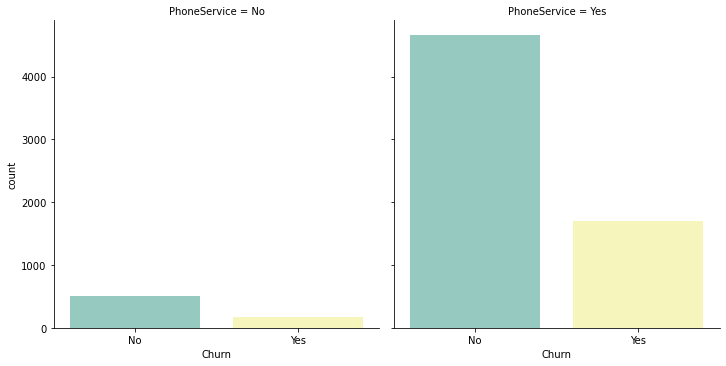

In [37]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PhoneService',data=df,kind='count',palette="Set3")

Customers with phoneservice are very high in number which is good.And Customers without Phone service are less churned.

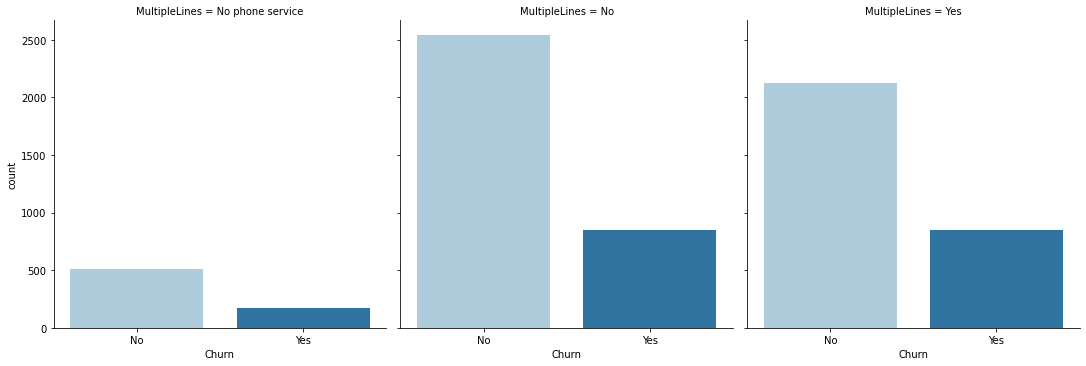

In [38]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='MultipleLines',data=df,kind='count',palette="Paired")

Customers with Multiplelines are less in number.And Customers with Multiplelines are less churned.

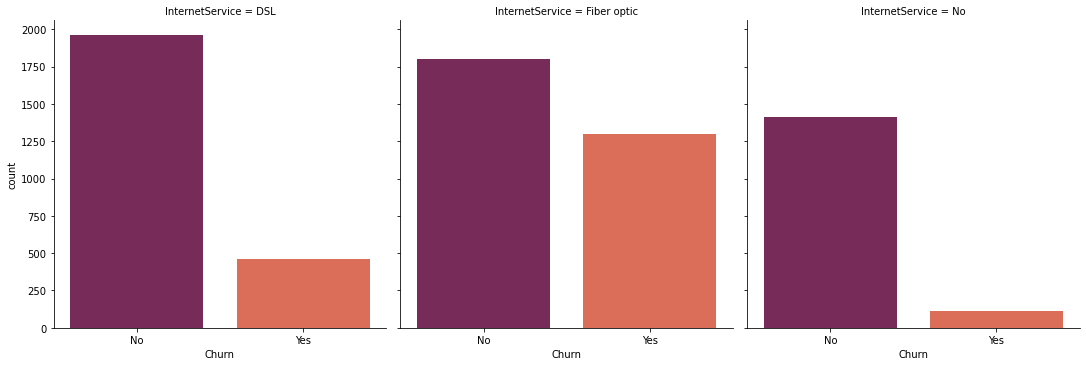

In [39]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='InternetService',data=df,kind='count',palette="rocket")

Customers with Fiber optic InternetService are high in number.And Customers with Fiber optic InternetService are highly churned than any other service users.

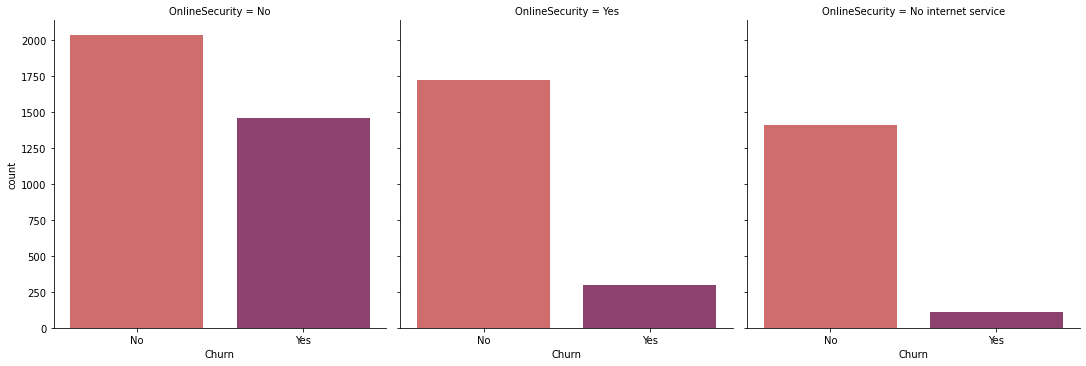

In [40]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineSecurity',data=df,kind='count',palette="flare")

Customers with onlinesecurity are more in number.But Customers without online service are more churned.

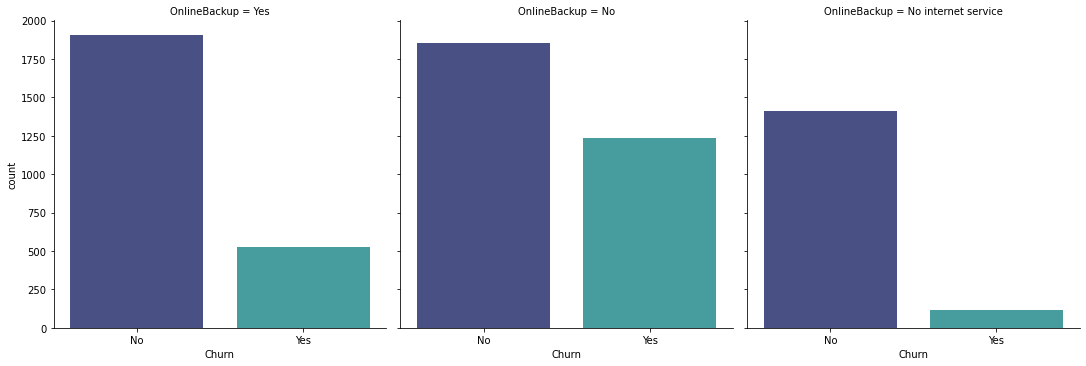

In [41]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineBackup',data=df,kind='count',palette="mako")

Customers without onlinebackup are more in number.And Customers without onlinebackup are more churned.

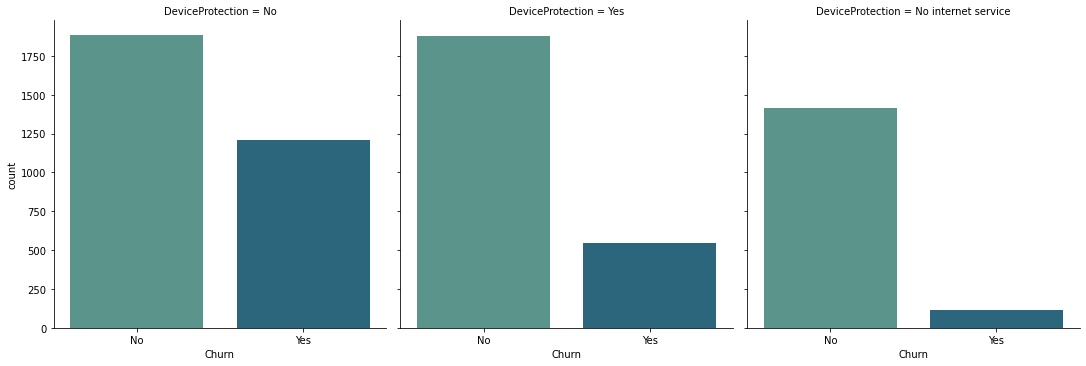

In [42]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='DeviceProtection',data=df,kind='count',palette="crest")

Customers wothout device protection are more in number.And Customers without device protection are more churned.

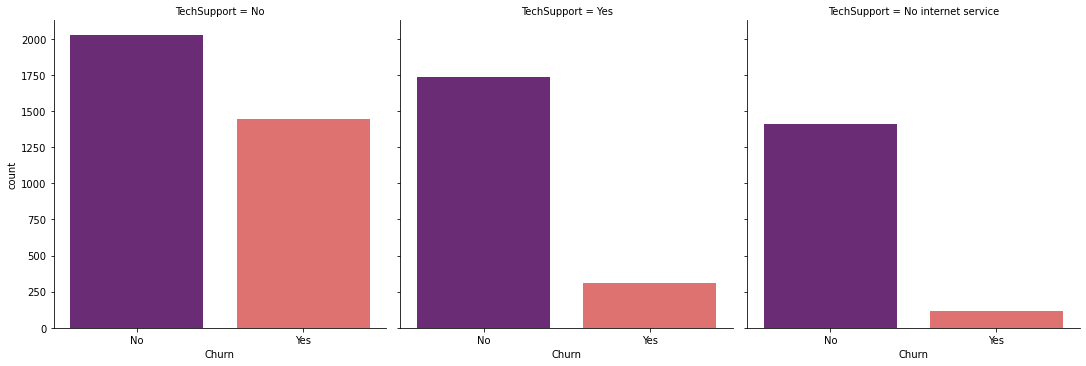

In [43]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='TechSupport',data=df,kind='count',palette="magma")

Customers Without techsupport are more in number.And Customers Without techsupport are more churned.

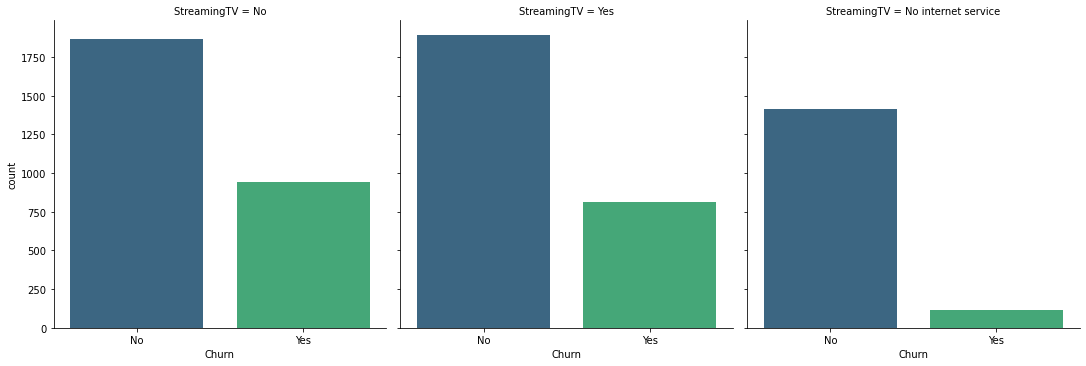

In [44]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingTV',data=df,kind='count',palette="viridis")

Customers Without StreamingTV are more in number.And Customers Without StreamingTV are more churned.

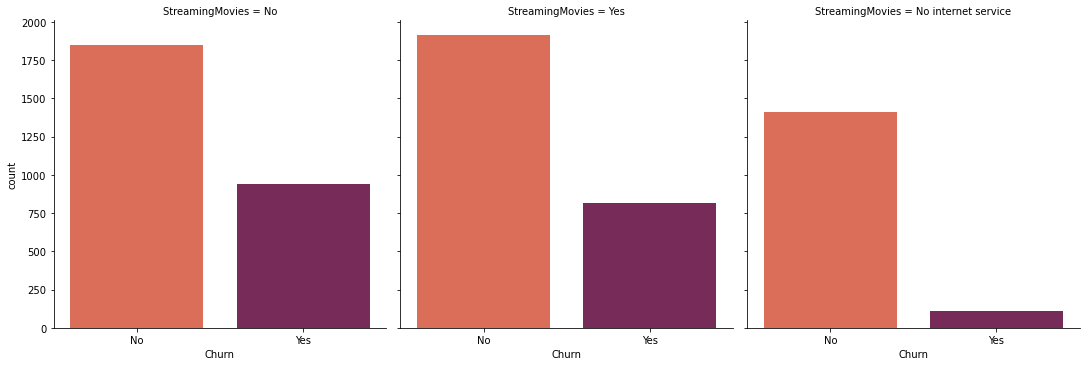

In [45]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingMovies',data=df,kind='count',palette="rocket_r")

Customers Without StreamingMovies are more in number.And Customers Without StreamingMovies are more churned.

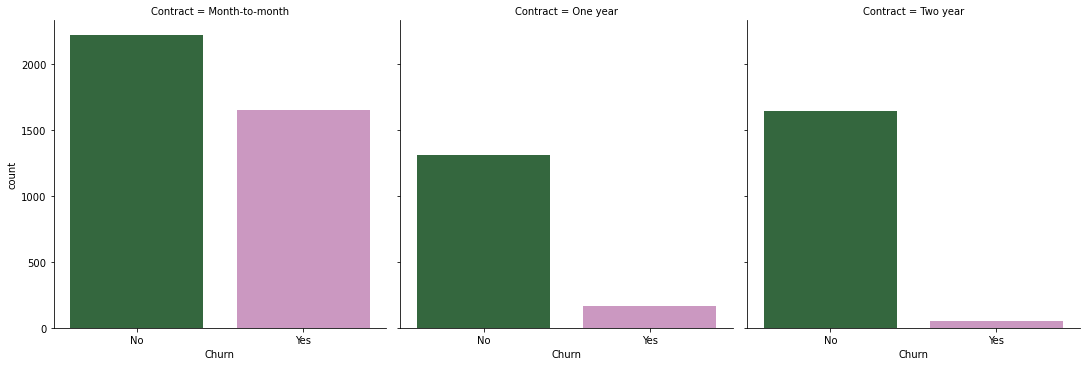

In [46]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Contract',data=df,kind='count',palette="cubehelix")

Customers With Month-to-month contract are more in number.And Customers With Month-to-month contract are more churned than other contracts.

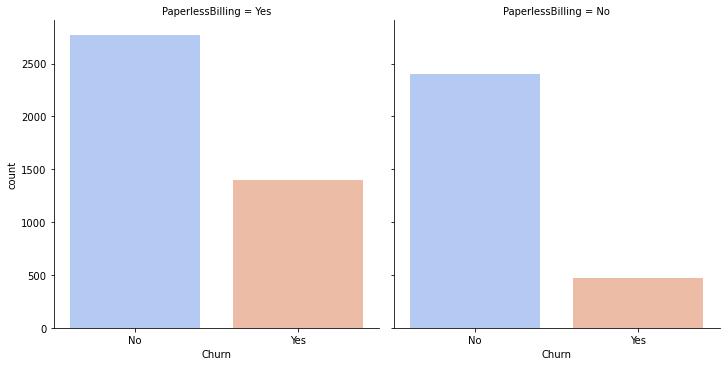

In [47]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaperlessBilling',data=df,kind='count',palette="coolwarm")

Customers With Paperlessbill are more in number.And Customers With paperlessbill are more churned.

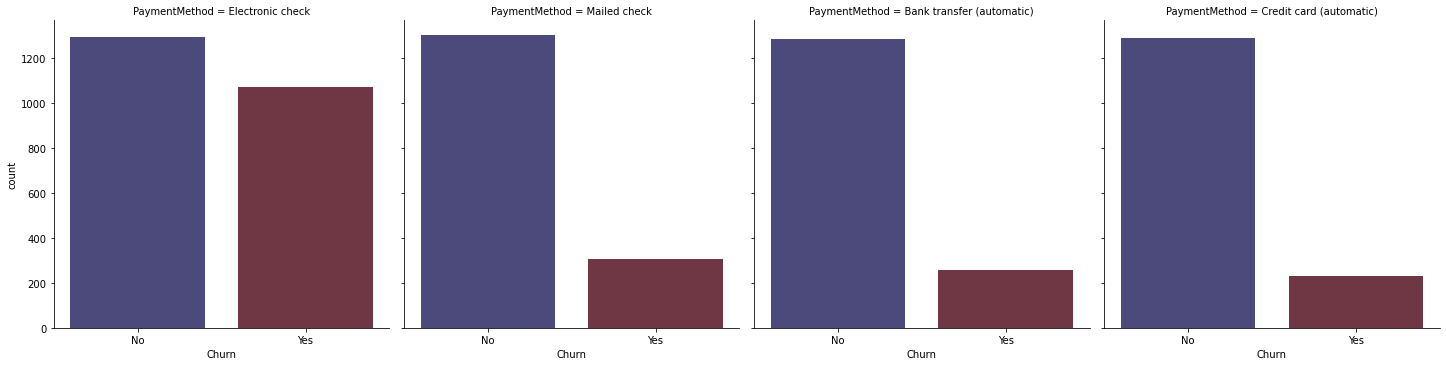

In [48]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaymentMethod',data=df,kind='count',palette="icefire")

Customers With Electronic check payment method are more in number.And Customers With Electronic check payment method are more churned.

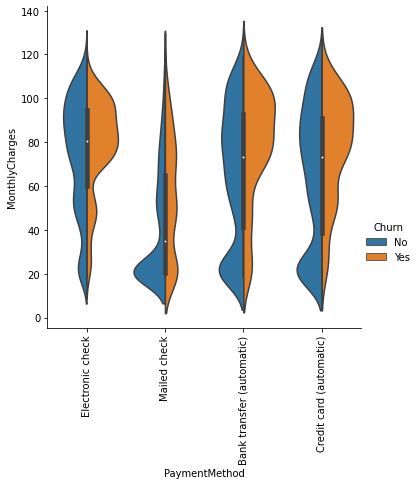

In [49]:
# Let's plot catplot for pair of features
sns.catplot(x = "PaymentMethod", y = "MonthlyCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate is high for Credit card users and bank transfers.

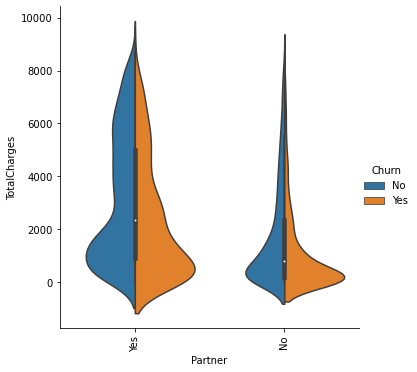

In [50]:
# Let's plot catplot for pair of features
sns.catplot(x = "Partner", y = "TotalCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate and total charges is high for customers with partners.

# Multivariate Analysis:

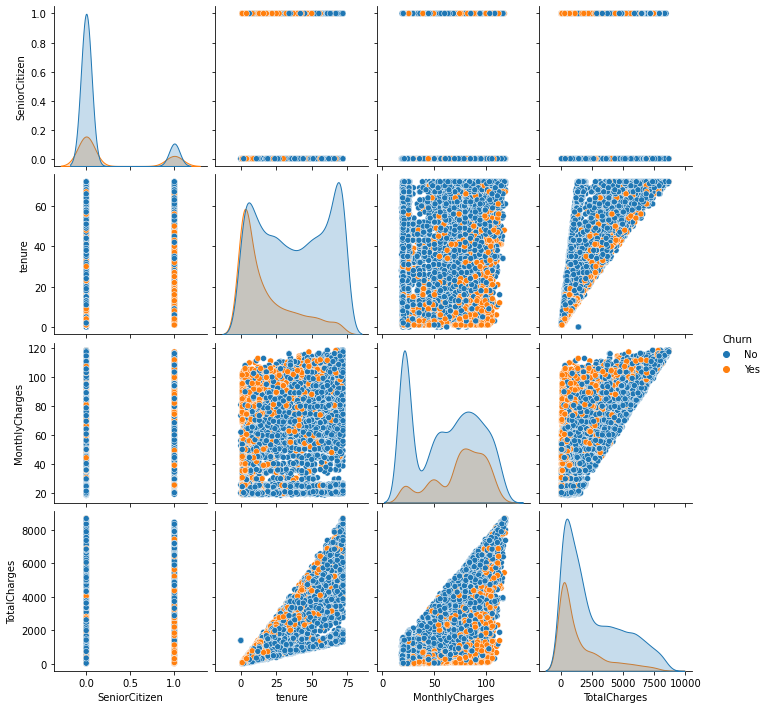

In [51]:
#pair ploting for df
sns.pairplot(df,hue="Churn")

Above is the pair plot for having Churn as target.There are some outliers present in the dataset.

### Encoding Target

In [52]:
#Encoding my target variable so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [53]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [54]:
#describing the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370
std,0.368612,24.559481,30.090047,2265.270398,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Observation:
- The minimum and maximum of Applicant Income is 150 & 81000 respectively, while the average age is 5400.
- While the minimum Coapplicant Income is 0 and maximum is 41667.
- We can notice the loan amount varying between 9 to 700 and mean being 146.
- The term is from 12 days to 480 days in this dataset.

<AxesSubplot:>

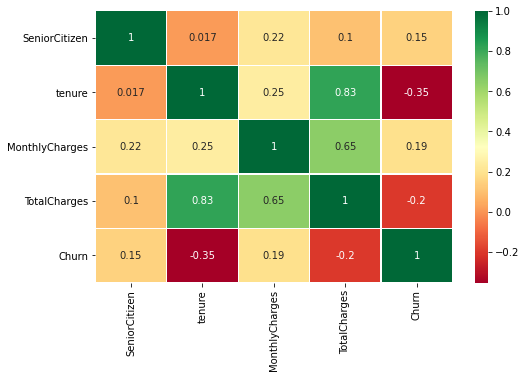

In [55]:
#Plotting heatmap with all features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that Credit history is positively correlated with the target variable. 
    Whereas, other continuous features shows no relation/slightly negative relation.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

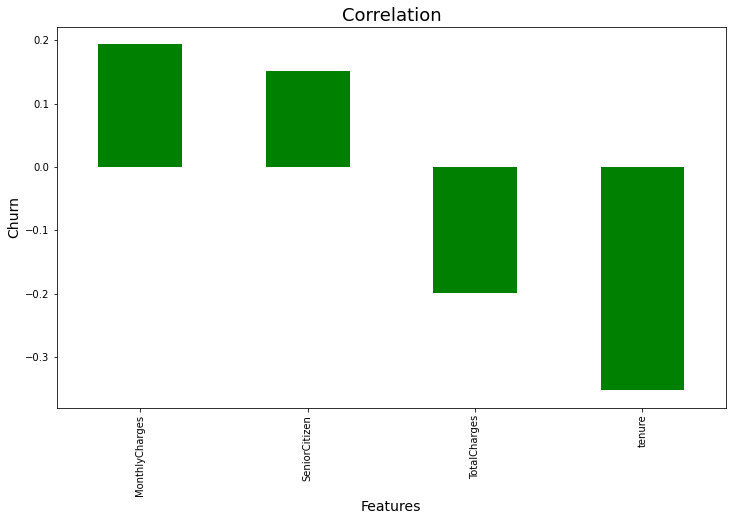

In [56]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(12,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Churn',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- I notice that tenure shows negative relation with target. 
- Rest all numerical features doesn't show mucch relationship with target.

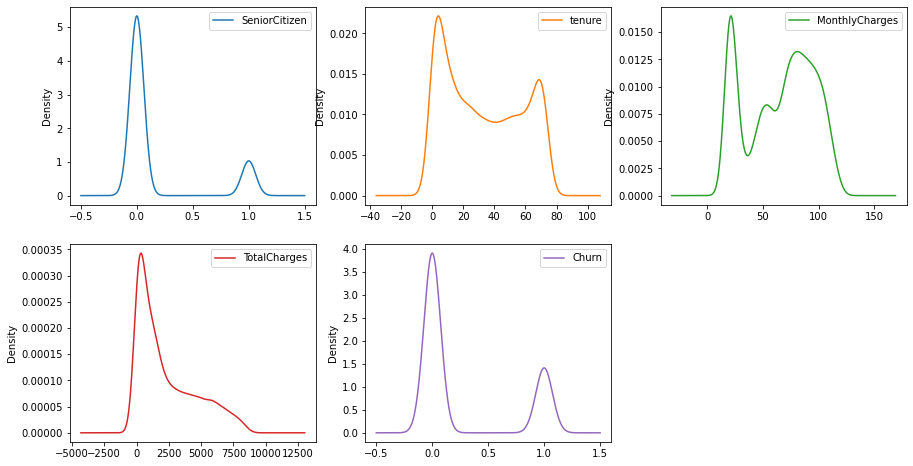

In [57]:
#Checking distribution with density graph
df.plot(kind="density",subplots=True,layout=(2,3),figsize=(15,8),sharex=False)
plt.show()

I can see that Applicant income and Coapplicant income is highly postively skewed. 

<Figure size 432x288 with 0 Axes>

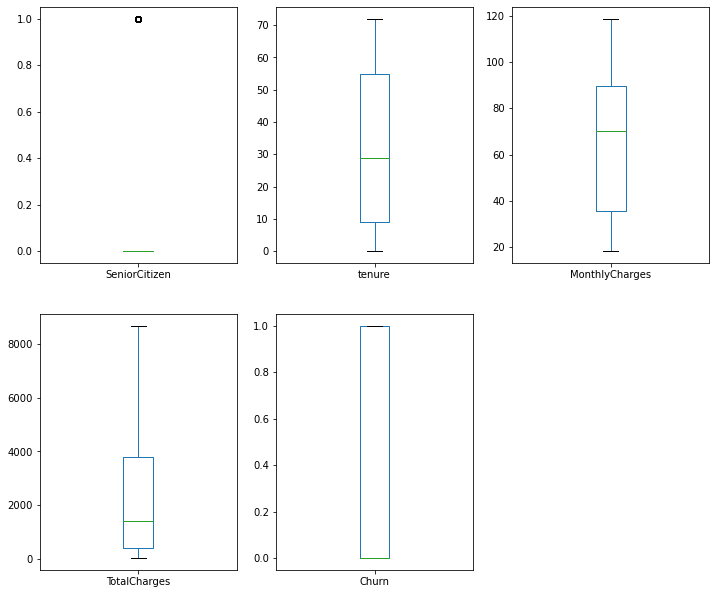

In [58]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,16))
plt.show()

In [59]:
df.columns[df.dtypes != "object"]

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

As observed from boxplot, there are no outliers present in numeric columns. 

    SeniorCitizen - Categorical - No need to remove outliers/skewness.

## Data cleaning

### Treating Skewness

In [60]:
#check skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
Churn             1.063031
dtype: float64

Keeping skewness range as +/-0.5

I will try to remove the skewness only in continuous colums. These are:
- TotalCharges

In [61]:
#Creating list of all the continuous columns with skewness
cols=['TotalCharges']

In [62]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df[cols] = PT.fit_transform(df[cols].values)
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144337
Churn             1.063031
dtype: float64

I can notice that skewness has been removed. Let me check the distribution. 

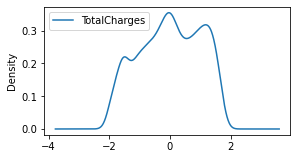

In [63]:
#Checking distribution with density graph
df[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,3),figsize=(15,8))
plt.show()

My continuous features now looks normally distributed.

### Encoding

In [64]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.columns[df.dtypes == "object"]
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [65]:
#Using labelencoder to encode the object type
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])   #.astype(str) will embed all values in str type

In [66]:
#checking the columns and its type after encoding
df[categorical_columns]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


I've successfully encoded all the categorical columns

### Splitting independent & target variable

In [132]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

### Treating class imbalance

In [133]:
#Treating Class imbalance in target
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

I can see that the targe column was balanced using SMOTE

### Scaling

In [134]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is categorical data
from sklearn.model_selection import train_test_split, cross_val_score

In [135]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [136]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.887254,-0.405783,1.266462,-0.528758,-1.115792,-3.055759,0.055214,-1.258874,-0.755515,1.393108,-0.902141,-0.770985,-1.058026,-1.070609,-0.644724,0.808433,0.424970,-1.329461,-1.676163
1,1.127073,-0.405783,-0.789601,-0.528758,0.256851,0.327251,-1.008754,-1.258874,1.694138,-0.901867,1.385375,-0.770985,-1.058026,-1.070609,0.665231,-1.236961,1.425333,-0.388309,0.366263
2,1.127073,-0.405783,-0.789601,-0.528758,-1.074197,0.327251,-1.008754,-1.258874,1.694138,1.393108,-0.902141,-0.770985,-1.058026,-1.070609,-0.644724,0.808433,1.425333,-0.495969,-1.256862
3,1.127073,-0.405783,-0.789601,-0.528758,0.714399,-3.055759,0.055214,-1.258874,1.694138,-0.901867,1.385375,1.663977,-1.058026,-1.070609,0.665231,-1.236961,-1.575754,-0.897087,0.345441
4,-0.887254,-0.405783,-0.789601,-0.528758,-1.074197,0.327251,-1.008754,0.221616,-0.755515,-0.901867,-0.902141,-0.770985,-1.058026,-1.070609,-0.644724,0.808433,0.424970,0.089212,-1.121068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.887254,-0.405783,-0.789601,-0.528758,-0.741435,0.327251,-1.008754,0.221616,-0.755515,-0.901867,-0.902141,-0.770985,-1.058026,1.144680,-0.644724,0.808433,-0.575392,0.388924,-0.252658
10344,-0.887254,-0.405783,-0.789601,-0.528758,-1.115792,0.327251,-1.008754,0.221616,-0.755515,0.245621,-0.902141,0.446496,1.158260,-1.070609,-0.644724,-1.236961,0.424970,0.812610,-1.319612
10345,-0.887254,-0.405783,1.266462,-0.528758,-0.991007,0.327251,-1.008754,1.702105,0.469312,0.245621,0.241617,0.446496,0.050117,0.037036,-0.644724,-1.236961,1.425333,-1.661383,-1.373952
10346,-0.887254,-0.405783,-0.789601,-0.528758,-1.115792,0.327251,-1.008754,0.221616,-0.755515,-0.901867,-0.902141,-0.770985,-1.058026,-1.070609,-0.644724,-1.236961,-1.575754,0.056220,-1.286347


The data looks scaled now. 

### Checking multicolinearity using VIF

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.015283,gender
1,1.093113,SeniorCitizen
2,1.536959,Partner
3,1.429871,Dependents
4,11.325596,tenure
5,1.694146,PhoneService
6,1.414633,MultipleLines
7,1.729551,InternetService
8,1.340964,OnlineSecurity
9,1.236366,OnlineBackup


In [138]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)

In [139]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.015231,gender
1,1.093081,SeniorCitizen
2,1.535242,Partner
3,1.427624,Dependents
4,2.771391,tenure
5,1.694136,PhoneService
6,1.408803,MultipleLines
7,1.706789,InternetService
8,1.335128,OnlineSecurity
9,1.234728,OnlineBackup


Now the multicolinearity issue is solved.All the VIF values are below 10 it is acceptable.

### FIND BEST random_state 

In [170]:
from sklearn.tree import DecisionTreeClassifier

#Using for loop to find best random state between 1 to 200
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7993558776167472  on Random_state  112


In [172]:
#Splitting the dataset for training and testing and using best random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.30, random_state = maxRS)

### Algorithms

In [173]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [174]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7910
CROSS VALIDATION SCORE: 0.7895297268394964
CONFUSION MATRIX:
[[1183  371]
 [ 278 1273]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.809719     0.774331  0.790982     0.792025      0.792042
recall        0.761261     0.820761  0.790982     0.791011      0.790982
f1-score      0.784743     0.796870  0.790982     0.790807      0.790801
support    1554.000000  1551.000000  0.790982  3105.000000   3105.000000


####  Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8367
CROSS VALIDATION SCORE: 0.8364034061590117
CONFUSION MATRIX:
[[1291  263]
 [ 244 1307]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.841042     0.832484  0.836715     0.836763      0.836767
recall        0.830759     0.842682  0.836715     0.836721      0.836715
f1-score      0.835869     0.837552  0.836715     0.836711      0.836710
support    1554.000000  1551.000000  0.836715  3105.000000   3105.000000


#### Support Vector Machine

In [176]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7855
CROSS VALIDATION SCORE: 0.7821832760114223
CONFUSION MATRIX:
[[1140  414]
 [ 252 1299]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.818966     0.758319  0.785507     0.788642      0.788671
recall        0.733591     0.837524  0.785507     0.785557      0.785507
f1-score      0.773931     0.795956  0.785507     0.784943      0.784933
support    1554.000000  1551.000000  0.785507  3105.000000   3105.000000


#### AdaBoost

In [177]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8019
CROSS VALIDATION SCORE: 0.7973597364359548
CONFUSION MATRIX:
[[1181  373]
 [ 242 1309]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.829937     0.778240  0.801932     0.804088      0.804113
recall        0.759974     0.843972  0.801932     0.801973      0.801932
f1-score      0.793416     0.809774  0.801932     0.801595      0.801587
support    1554.000000  1551.000000  0.801932  3105.000000   3105.000000


#### Decision Tree Classifier

In [178]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

evaluate(dt_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.7942
CROSS VALIDATION SCORE: 0.7923341809037483
CONFUSION MATRIX:
[[1225  329]
 [ 310 1241]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.798046     0.790446  0.794203     0.794246      0.794249
recall        0.788288     0.800129  0.794203     0.794209      0.794203
f1-score      0.793137     0.795258  0.794203     0.794197      0.794196
support    1554.000000  1551.000000  0.794203  3105.000000   3105.000000


#### Extra Tree Classifier

In [179]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf=ExtraTreesClassifier()
et_clf.fit(X_train, y_train)

evaluate(et_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8277
CROSS VALIDATION SCORE: 0.8299292757359036
CONFUSION MATRIX:
[[1291  263]
 [ 272 1279]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.825976     0.829442  0.827697     0.827709      0.827707
recall        0.830759     0.824629  0.827697     0.827694      0.827697
f1-score      0.828361     0.827029  0.827697     0.827695      0.827695
support    1554.000000  1551.000000  0.827697  3105.000000   3105.000000


I got the accuracy_score & cross validation scores of all the algorithms.

On checking the difference between accuracy_score & cross_val_score, I found that RandomForestClassifier has least difference. Hence, this is my best model and I will tune this.

## HYPERPARAMETER TUNING

In [180]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [181]:
#RandomForestClassifier Tuning

#Creating RandomForestClassifier parameters dictionary

param_grid = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300],
             'max_features': ["auto","sqrt","log2"]}

In [182]:
#Create a GridSearchCV object and fit it to the training data
rf_hp = GridSearchCV(RandomForestClassifier(),param_grid,refit=True)   #or cv=5
rf_hp.fit(X_train,y_train)
rf_hp.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 100}

In [184]:
#Using the best parameters
final_mod = RandomForestClassifier( criterion='gini', max_depth=15, n_estimators=100, max_features='auto' )
final_mod.fit(X_train,y_train)
pred = final_mod.predict(X_test)
evaluate(final_mod, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8380
CROSS VALIDATION SCORE: 0.8392052918280669
CONFUSION MATRIX:
[[1276  278]
 [ 225 1326]]
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.850100     0.826683  0.838003     0.838392      0.838403
recall        0.821107     0.854932  0.838003     0.838020      0.838003
f1-score      0.835352     0.840571  0.838003     0.837961      0.837959
support    1554.000000  1551.000000  0.838003  3105.000000   3105.000000


### After tuning, the accuracy is 83.80%

## ROC-AUC Curve

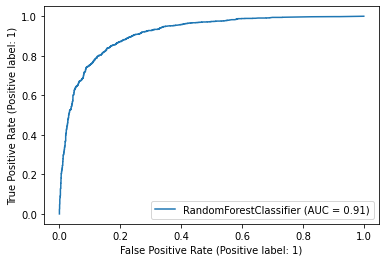

In [185]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(ETC) is 0.91

## SERIALIZATON (Saving model)

In [186]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"telecom_churn.pkl")

['telecom_churn.pkl']

### Done :)